## Table of Contents

* [Chapter 0 - Libraries](#chapter0)
* [Chapter 1 - Cleaning](#chapter1)
* [Chapter 2 - Retraction Characteristics](#chapter2)   
    * [2.1 - Temporal trends](#section_2_1)
    * [2.2 - Reasons for Retraction](#section_2_2)
    * [2.3 - Geographical Differences](#section_2_3)
    * [2.4 - Analysis per Journal](#section_2_4)
    * [2.5 - Analysis per Scientific area](#section_2_5)
* [Chapter 3 - Citations/Altmetrics](#chapter4)  
* [Chapter 4 - Referee Reports](#chapter5)
* [Chapter 5 - Impact](#chapter6)


<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">

# Chapter 0 - Libraries <a class="anchor" id="chapter0"></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">

# Chapter 1 - Cleaning <a class="anchor" id="chapter1"></a>

In [2]:
rw = pd.read_excel('./retractions_data/retraction_watch_database.xlsx')
rw.head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,47271,Binding of DCC by Netrin-1 to Mediate Axon Gui...,(BLS) Biology - Cellular;(BLS) Biology - Gener...,Departments of Anatomy and of Biochemistry and...,Science,American Association for the Advancement of Sc...,United States,Elke Stein;Yimin Zou;Mu-ming Poo;Marc Tessier-...,https://retractionwatch.com/2023/08/31/stanfor...,Research Article;,2023-08-31 00:00:00,10.1126/science.adk1521,0.0,2001-03-09 00:00:00,10.1126/science.1059391,11239160.0,Retraction,+Investigation by Company/Institution;+Manipul...,No,NaN
1,47270,Hierarchical Organization of Guidance Receptor...,(BLS) Biochemistry;(BLS) Biology - General;(BL...,Department of Anatomy and Department of Bioche...,Science,American Association for the Advancement of Sc...,United States,Elke Stein;Marc Tessier-Lavigne,https://retractionwatch.com/2023/08/31/stanfor...,Research Article;,2023-08-31 00:00:00,10.1126/science.adk1517,0.0,2001-02-08 00:00:00,10.1126/science.1058445,11239147.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN
2,47243,Therapeutic potential of targeting IRES-depend...,(BLS) Biochemistry;(BLS) Biology - Cancer;(BLS...,"Division of Hematology-Oncology, UCLA-Greater ...",Oncogene,Springer - Nature Publishing Group,United States,Y Shi;Y Yang;C Bardeleben;B Holmes;J Gera;Alan...,NaN,Research Article;,2023-08-31 00:00:00,10.1038/s41388-023-02820-5,0.0,2015-05-11 00:00:00,10.1038/onc.2015.156,25961916.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,see also: https://pubpeer.com/publications/704...
3,47233,A classifier based on 273 urinary peptides pre...,(BLS) Biochemistry;(HSC) Medicine - Cardiovasc...,"Department of Nephrology, The Third Affiliated...",Journal of Hypertension,Wolters Kluwer - Lippincott Williams & Wilkins,China,Lirong Lin;Chunxuan Wang;Jiangwen Ren;Mei Mei;...,NaN,Research Article;,2023-08-30 00:00:00,10.1097/HJH.0000000000003551,37642599.0,2023-08-01 00:00:00,10.1097/HJH.0000000000003467,37199562.0,Retraction,+Concerns/Issues About Results;+Investigation ...,No,see also https://journals.lww.com/jhypertensio...
4,47227,"Age, Gender Demographics and Comorbidity Preva...",(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,"Department of Orthopaedics, Dhanalakshmi Srini...",Journal of Coastal Life Medicine,Journal of Coastal Life Medicine,India,S Venkatesh Kumar;Mohith Singh;Gowtham Singh;K...,NaN,Research Article;,2023-08-30 00:00:00,unavailable,0.0,2023-01-01 00:00:00,unavailable,0.0,Retraction,+Notice - Lack of;+Withdrawal;,No,"date of retraction unknown, article title repl..."


In [3]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42700 entries, 0 to 42699
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              42700 non-null  int64  
 1   Title                  42700 non-null  object 
 2   Subject                42700 non-null  object 
 3   Institution            42699 non-null  object 
 4   Journal                42700 non-null  object 
 5   Publisher              42700 non-null  object 
 6   Country                42700 non-null  object 
 7   Author                 42700 non-null  object 
 8   URLS                   21687 non-null  object 
 9   ArticleType            42700 non-null  object 
 10  RetractionDate         42700 non-null  object 
 11  RetractionDOI          42209 non-null  object 
 12  RetractionPubMedID     37599 non-null  float64
 13  OriginalPaperDate      42700 non-null  object 
 14  OriginalPaperDOI       40173 non-null  object 
 15  Or

In [4]:
rw['RetractionDate'] = pd.to_datetime(rw['RetractionDate'], errors='coerce') #, infer_datetime_format=True
rw['OriginalPaperDate'] = pd.to_datetime(rw['OriginalPaperDate'])

In [5]:
rw[rw['Title'] =='The association between early career informal mentorship in academic collaborations and junior author performance']['Reason'].value_counts()

Reason
+Concerns/Issues About Data;+Concerns/Issues About Results;+Error in Analyses;+Error in Methods;    1
Name: count, dtype: int64

In [6]:
rw[rw['OriginalPaperDOI']=='10.1021/cr030666m']

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes


In [7]:
rw['OriginalPaperDOI'].nunique()

36846

In [8]:
rw['RetractionDOI'].nunique()

36506

In [9]:
rw[rw.duplicated(subset='OriginalPaperDOI', keep=False)]

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
4,47227,"Age, Gender Demographics and Comorbidity Preva...",(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,"Department of Orthopaedics, Dhanalakshmi Srini...",Journal of Coastal Life Medicine,Journal of Coastal Life Medicine,India,S Venkatesh Kumar;Mohith Singh;Gowtham Singh;K...,NaN,Research Article;,2023-08-30,unavailable,0.0,2023-01-01,unavailable,0.0,Retraction,+Notice - Lack of;+Withdrawal;,No,"date of retraction unknown, article title repl..."
55,47026,Is continuous cardiac output measurement using...,(BLS) Biochemistry;(HSC) Medicine - Anesthesia...,Department of Anesthesiology and Intensive Car...,Critical Care Medicine,Wolters Kluwer - Lippincott Williams & Wilkins,Germany,Joachim Boldt;Thilo Menges;Mathias Wollbruck;H...,https://retractionwatch.com/?s=Joachim+Boldt,Clinical Study;,2023-08-17,10.1097/CCM.0000000000005908,37589533.0,1994-12-01,unavailable,7988126.0,Retraction,+Concerns/Issues About Data;+Investigation by ...,No,Joachim Boldt has institutional finding of mis...
1950,44307,Fracture Resistance of Two Novel Custom Made P...,(HSC) Medicine - Dentistry;(PHY) Materials Sci...,"Fixed Prosthodontics Department, Faculty of De...",IOSR Journal of Dental and Medical Sciences,International Organization of Scientific Resea...,Egypt,M El Sayed;M Zohdy;M Nour;A El Gamal,NaN,Research Article;,2023-05-03,unavailable,0.0,2022-06-01,unavailable,0.0,Retraction,+Date of Retraction/Other Unknown;+Notice - La...,No,"date of retraction unkown, stealth retraction ..."
2310,43875,Long noncoding RNA DLX6-AS1 targets miR-124-3p...,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Department of Child Health Care, The Second Af...",American Journal of Translational Research,e-Century Publishing Corporation,China,Xiaomei Lei;Siping Yang;Yuanyuan Yang;Juan Zha...,NaN,Research Article;,2023-03-15,unavailable,37056831.0,2019-10-15,unavailable,31737208.0,Retraction,+Unreliable Data;,No,NaN
2523,43231,Exosomal long noncoding RNA AGAP2-AS1 regulate...,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Department of Breast Surgery, The First Affili...",American Journal of Cancer Research,e-Century Publishing Corporation,China;Germany,Xueke Qian;Hongbo Qu;Fan Zhang;Shujia Peng;Don...,NaN,Research Article;,2023-02-15,unavailable,36895985.0,2021-05-15,unavailable,34094664.0,Retraction,+Error in Analyses;+Unreliable Results;,No,see also: https://pubpeer.com/publications/9D6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42647,3902,Effect of Platinum Compounds on Murine Lymphoc...,(BLS) Biochemistry;(BLS) Biology - Molecular;(...,Unavailable,Japanese Journal of Medical Science & Biology,"National Institute of Infectious Diseases, Jap...",Unknown,Elias A K Alsabti;O N Ghalib;M H Salem,NaN,Research Article;,1980-08-01,Unavailable,6765630.0,1979-04-01,Unavailable,396398.0,Retraction,+Notice - Unable to Access via current resourc...,No,NaN
42685,17312,Hyperextensibility and weakness in cerebral pa...,(HSC) Medicine - Neurology;,unavailable,Revue de Chirurgie Orthopedique et Reparatrice...,Elsevier,Unknown,G Tardieu;J C Tabary;C Tardieu;M Lombard,NaN,Research Article;,1971-10-01,unavailable,4261570.0,1971-10-01,unavailable,4261570.0,Retraction,+Notice - Unable to Access via current resources;,No,NaN
42695,10433,Change of Venue and the Conflict of Laws,(SOC) Law/Legal Issues;,University of Chicago;,The University of Chicago Law Review,University of Chicago Law School,United States,Brainerd Currie,NaN,Research Article;,1960-02-01,NaN,NaN,1955-02-01,NaN,NaN,Retraction,+Error in Results and/or Conclusions;+Unreliab...,Yes,NaN
42698,17246,The Trend-Seasonal Normal in Time Series,(ENV) Climatology;,Yale University,Journal of the American Statistical Association,Taylor and Francis,Unite

In [10]:
rw[rw['Title'].str.startswith("Retracted")]

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
1326,46570,Retracted: miR-214-3p Protects and Restores th...,(BLS) Biology - Molecular;(BLS) Genetics;(HSC)...,Key Laboratory of Advanced Technologies of Mat...,Evidence-Based Complementary and Alternative M...,Hindawi,China,Yuan Cheng;Qing He;Tao Jin;Na Li,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,2023-06-21,10.1155/2023/9823451,37388114.0,2022-07-18,10.1155/2022/1175935,35899226.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues a...,No,See also: https://pubpeer.com/publications/C08...
13359,45110,Retracted: Lifting the lid on lobbying in Indi...,(B/T) Government;,"Department of Management Studies, Indian Insti...",Journal of Public Affairs,Wiley,India,Pankaj K P Shreyaskar;Pramod Pathak,NaN,Research Article;,2020-09-21,10.1002/pa.2423,0.0,2020-09-21,10.1002/pa.2423,0.0,Retraction,+Date of Retraction/Other Unknown;+Euphemisms ...,No,NaN


In [11]:
testing_dupes = rw[rw.duplicated(subset='OriginalPaperDOI', keep=False)]
testing_dupes['OriginalPaperDOI'].value_counts()

OriginalPaperDOI
Unavailable                        2234
unavailable                        1074
10.1136/jim-2021-SRMC                 6
10.1002/tox.21941                     2
10.1016/j.lfs.2019.116709             2
10.1038/s41598-021-03765-z            2
10.1007/s12275-012-2294-z             2
10.1016/j.cej.2011.04.016             2
10.1016/j.swevo.2021.100868           2
10.1016/j.esxm.2021.100447            2
10.1093/jge/aabc74                    2
10.1088/1742-2140/aaaf57              2
10.1088/1742-2140/aa953a              2
10.1016/j.carbpol.2019.115799         2
10.1001/archpediatrics.2012.999       2
10.1007/s13277-014-2995-5             2
10.3109/02699052.2016.1162060         2
10.1016/j.rapm.2005.05.009            2
10.1524/9783486834062.275             2
Name: count, dtype: int64

In [12]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42700 entries, 0 to 42699
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Record ID              42700 non-null  int64         
 1   Title                  42700 non-null  object        
 2   Subject                42700 non-null  object        
 3   Institution            42699 non-null  object        
 4   Journal                42700 non-null  object        
 5   Publisher              42700 non-null  object        
 6   Country                42700 non-null  object        
 7   Author                 42700 non-null  object        
 8   URLS                   21687 non-null  object        
 9   ArticleType            42700 non-null  object        
 10  RetractionDate         42700 non-null  datetime64[ns]
 11  RetractionDOI          42209 non-null  object        
 12  RetractionPubMedID     37599 non-null  float64       
 13  O

In [13]:
rw.sort_values(by=['OriginalPaperDOI', 'OriginalPaperDate'], ascending=[True, False], inplace=True)

# Keep only the first occurrence of each unique DOI (the most recent date)
filtered_rw = rw.drop_duplicates(subset='OriginalPaperDOI')

In [14]:
retractions_data = pd.read_csv('./retractions_data/wos_retractions_data.csv')
retractions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23558 entries, 0 to 23557
Data columns (total 71 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Publication Type                                         23558 non-null  object 
 1   Authors                                                  23555 non-null  object 
 2   Book Authors                                             45 non-null     object 
 3   Editors                                                  1374 non-null   object 
 4   Book Group Authors                                       757 non-null    object 
 5   Author Full Name                                         23555 non-null  object 
 6   Book Authors Full Name                                   45 non-null     object 
 7   Group Authors                                            85 non-null     object 
 8   Document Title            

C:\Users\isabe\AppData\Local\Temp\ipykernel_2160\2033998879.py:1: DtypeWarning: Columns (2,6,36,58,60,65,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  retractions_data = pd.read_csv('./retractions_data/wos_retractions_data.csv')


In [15]:
retractions_data[retractions_data.duplicated()].shape[0]

6338

In [16]:
retractions_data.drop_duplicates(inplace=True)

# Replace all NaN values with a common value (e.g., a string)
retractions_data = retractions_data.fillna('This is a missing value')

# Use drop_duplicates to remove duplicates with 'NaN' values
retractions_data = retractions_data.drop_duplicates()

# Now, you can replace the 'NaN' values with NaN again if needed
retractions_data = retractions_data.replace('This is a missing value', np.nan)

In [17]:
retractions_data[retractions_data['Digital Object Identifier (DOI)'].duplicated()].shape[0]

4884

In [18]:
retractions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17220 entries, 0 to 23557
Data columns (total 71 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Publication Type                                         17220 non-null  object 
 1   Authors                                                  17217 non-null  object 
 2   Book Authors                                             43 non-null     object 
 3   Editors                                                  1255 non-null   object 
 4   Book Group Authors                                       718 non-null    object 
 5   Author Full Name                                         17217 non-null  object 
 6   Book Authors Full Name                                   43 non-null     object 
 7   Group Authors                                            48 non-null     object 
 8   Document Title                 

In [19]:
retractions_data['Year Published'].describe()

count    17220.000000
mean      2013.044715
std         21.391540
min          6.000000
25%       2009.000000
50%       2014.000000
75%       2018.000000
max       2023.000000
Name: Year Published, dtype: float64

In [20]:
retractions_data['Year Published'] = np.where(retractions_data['Year Published'] < 1000, 2000, retractions_data['Year Published'])

In [21]:
retractions_data['Publication Date'].fillna('JAN', inplace=True)

retractions_data['Publication Date'] = pd.to_datetime(retractions_data['Publication Date'] + ' ' + retractions_data['Year Published'].astype(str), errors='coerce')
retractions_data['Publication Date'].fillna(pd.to_datetime('JAN 01 ' + retractions_data['Year Published'].astype(str), format='%b %d %Y'), inplace=True)

# Sort the DataFrame by DOI and 'Publication Date' in descending order
retractions_data.sort_values(by=['Digital Object Identifier (DOI)', 'Publication Date'], ascending=[True, False], inplace=True)

# Keep only the first occurrence of each unique DOI (the most recent date)
filtered_wos = retractions_data.drop_duplicates(subset='Digital Object Identifier (DOI)')


In [23]:
retractions_data['Publication Date']# = pd.to_datetime(retractions_data['Publication Date'])

13322   2005-01-01
19790   2005-01-01
13159   2005-01-01
19791   2005-01-01
19758   2005-01-01
           ...    
23556   1989-01-01
11636   1986-01-01
23516   1986-01-01
23517   1986-01-01
23067   1978-01-01
Name: Publication Date, Length: 17220, dtype: datetime64[ns]

In [24]:
retractions_data.head()

,Publication Type,Authors,Book Authors,Editors,Book Group Authors,Author Full Name,Book Authors Full Name,Group Authors,Document Title,Publication Name,...,Web of Science Categories,WE,Research Areas,Document Delivery Number,PubMed ID,Open Access Indicator,ESI Highly Cited Paper,ESI Hot Paper,Date this report was generated,Accession Number
13322,J,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,NaN,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,RETRACTED: The prevention of hip fracture with...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087821.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800010
19790,J,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,NaN,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,RETRACTED: The prevention of hip fracture with...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087821.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800010
13159,J,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,NaN,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,RETRACTED: Risedronate sodium therapy for prev...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087822.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800011
19791,J,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,NaN,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,RETRACTED: Risedronate sodium therapy for prev...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087822.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800011
19758,J,"Panagiotakos, DB; Kromhout, D; Menotti, A; Chr...",NaN,NaN,NaN,"Panagiotakos, DB; Kromhout, D; Menotti, A; Chr...",NaN,NaN,RETRACTED: The relation between pulse pressure...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,974FN,16217005.0,NaN,NaN,NaN,05/11/2023,WOS:000232576800013


In [36]:
retractions_data[(~retractions_data['Document Title'].str.startswith("RETRACTED")) & (~retractions_data['Document Title'].str.contains("(Withdrawn Publication)"))]


C:\Users\isabe\AppData\Local\Temp\ipykernel_2160\338401715.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  retractions_data[(~retractions_data['Document Title'].str.startswith("RETRACTED")) & (~retractions_data['Document Title'].str.contains("(Withdrawn Publication)"))]


,Publication Type,Authors,Book Authors,Editors,Book Group Authors,Author Full Name,Book Authors Full Name,Group Authors,Document Title,Publication Name,...,Web of Science Categories,WE,Research Areas,Document Delivery Number,PubMed ID,Open Access Indicator,ESI Highly Cited Paper,ESI Hot Paper,Date this report was generated,Accession Number
15076,J,"Gangidi, PR; Souriyasak, N",NaN,NaN,NaN,"Gangidi, Prashant Reddy; Souriyasak, Noy",NaN,NaN,Solder Selection for Reflowing Large Ceramic S...,JOURNAL OF FAILURE ANALYSIS AND PREVENTION,...,"Engineering, Multidisciplinary",Emerging Sources Citation Index (ESCI),Engineering,FH4QU,NaN,NaN,NaN,NaN,05/11/2023,WOS:000411144100009
14979,J,"Lyu, WH; Zhang, J",NaN,NaN,NaN,"Lyu, Weihua; Zhang, Jian",NaN,NaN,The Influence of Childhood Psychological Maltr...,EURASIA JOURNAL OF MATHEMATICS SCIENCE AND TEC...,...,Education & Educational Research,Social Science Citation Index (SSCI),Education & Educational Research,FO1JZ,NaN,gold,NaN,NaN,05/11/2023,WOS:000416517000040


In [26]:
#retractions_data.iloc[[2,6,36,58,60,65,67,68]]

In [27]:
retractions_data['Digital Object Identifier (DOI)'].nunique()

12335

In [28]:
retractions_data['Digital Object Identifier (DOI)'].value_counts()

Digital Object Identifier (DOI)
10.1126/science.1192049                       3
10.1111/j.1751-2980.2011.00571.x              3
10.3389/fonc.2019.01175                       3
10.3389/fonc.2021.630408                      3
10.3892/mmr.2018.9385                         3
                                             ..
10.1080/15384101.2020.1762039                 1
10.1080/15384101.2020.1757936                 1
10.1080/15384101.2020.1743912                 1
10.1080/15384101.2020.1732515                 1
http://dx.doi.org/10.1021/acsomega.0c04799    1
Name: count, Length: 12335, dtype: int64

In [29]:
retractions_data.shape

(17220, 71)

In [30]:
retractions_data[retractions_data.duplicated(subset='Digital Object Identifier (DOI)', keep=False)]

,Publication Type,Authors,Book Authors,Editors,Book Group Authors,Author Full Name,Book Authors Full Name,Group Authors,Document Title,Publication Name,...,Web of Science Categories,WE,Research Areas,Document Delivery Number,PubMed ID,Open Access Indicator,ESI Highly Cited Paper,ESI Hot Paper,Date this report was generated,Accession Number
13322,J,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,NaN,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,RETRACTED: The prevention of hip fracture with...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087821.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800010
19790,J,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,NaN,"Sato, Y; Kanoko, T; Satoh, K; Iwamoto, J",NaN,NaN,RETRACTED: The prevention of hip fracture with...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087821.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800010
13159,J,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,NaN,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,RETRACTED: Risedronate sodium therapy for prev...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087822.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800011
19791,J,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,NaN,"Sato, Y; Iwamoto, J; Kanoko, T; Satoh, K",NaN,NaN,RETRACTED: Risedronate sodium therapy for prev...,ARCHIVES OF INTERNAL MEDICINE,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087822.0,NaN,NaN,NaN,05/11/2023,WOS:000231034800011
8932,J,"Fujii, Y; Tanaka, H; Ito, M",NaN,NaN,NaN,"Fujii, Y; Tanaka, H; Ito, M",NaN,NaN,RETRACTED: A randomized clinical trial of a si...,ARCHIVES OF OPHTHALMOLOGY,...,Ophthalmology,Science Citation Index Expanded (SCI-EXPANDED),Ophthalmology,886RL,15642807.0,NaN,NaN,NaN,05/11/2023,WOS:000226245900002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23556,J,"BOLDT, J; KLING, D; VONBORMANN, B; ZUGE, M; SC...",NaN,NaN,NaN,"BOLDT, J; KLING, D; VONBORMANN, B; ZUGE, M; SC...",NaN,NaN,RETRACTED: BLOOD CONSERVATION IN CARDIAC OPERA...,JOURNAL OF THORACIC AND CARDIOVASCULAR SURGERY,...,Cardiac & Cardiovascular Systems; Respiratory ...,Science Citation Index Expanded (SCI-EXPANDED),Cardiovascular System & Cardiology; Respirator...,AA700,2786116.0,NaN,NaN,NaN,05/11/2023,WOS:A1989AA70000004
11636,J,"BOLDT, J; VONBORMANN, B; KLING, D; BORNER, U; ...",NaN,NaN,NaN,"BOLDT, J; VONBORMANN, B; KLING, D; BORNER, U; ...",NaN,NaN,RETRACTED: VOLUME REPLACEMENT WITH A NEW HYDRO...,INFUSIONSTHERAPIE UND KLINISCHE ERNAHRUNG,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,D1812,2427448.0,NaN,NaN,NaN,05/11/2023,WOS:A1986D181200006
23516,J,"GLUECK, CJ; MELLIES, MJ; DINE, M; PERRY, T; LA...",NaN,NaN,NaN,"GLUECK, CJ; MELLIES, MJ; DINE, M; PERRY, T; LA...",NaN,NaN,RETRACTED: SAFETY AND EFFICACY OF LONG-TERM DI...,PEDIATRICS,...,Pediatrics,Science Citation Index Expanded (SCI-EXPANDED),Pediatrics,D4187,3526270.0,NaN,NaN,NaN,05/11/2023,WOS:A1986D418700025
23517,J,"BOLDT, J; VONBORMANN, B; KLING, D; BORNER, U; ...",NaN,NaN,NaN,"BOLDT, J; VONBORMANN, B; KLING, D; BORNER, U; ...",NaN,NaN,RETRACTED: VOLUME REPLACEMENT WITH A NEW HYDRO...,INFUSIONSTHERAPIE UND KLINISCHE ERNAHRUNG,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,D1812,2427448.0,NaN,NaN,NaN,05/11/2023,WOS:A1986D181200006


In [31]:
testing_dupes = retractions_data[retractions_data.duplicated(subset='Digital Object Identifier (DOI)', keep=False)]
testing_dupes['Digital Object Identifier (DOI)'].value_counts()

Digital Object Identifier (DOI)
10.1016/j.ijmedinf.2011.08.013     3
10.1016/j.micpath.2020.104550      3
10.1155/2018/4514329               3
10.1016/j.neubiorev.2009.11.014    3
10.1242/dev.146894                 3
                                  ..
10.1016/j.patcog.2010.11.017       2
10.1016/j.pbb.2008.11.010          2
10.1016/j.peptides.2016.06.003     2
10.1016/j.pharep.2018.01.007       2
10.7860/JCDR/2018/32666.11719      2
Name: count, Length: 4000, dtype: int64

In [194]:
unique_counts = testing_dupes[testing_dupes['Digital Object Identifier (DOI)']=='10.1093/aje/kwq207'].nunique()
unique_counts[unique_counts > 1].index

Index(['Usage Count (Since 2013)', 'Volume', 'Beginning Page', 'Ending Page',
       'Page Count', 'PubMed ID'],
      dtype='object')

In [210]:
retractions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19630 entries, 13322 to 23067
Data columns (total 71 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Publication Type                                         19630 non-null  object        
 1   Authors                                                  19627 non-null  object        
 2   Book Authors                                             44 non-null     object        
 3   Editors                                                  1291 non-null   object        
 4   Book Group Authors                                       718 non-null    object        
 5   Author Full Name                                         19627 non-null  object        
 6   Book Authors Full Name                                   44 non-null     object        
 7   Group Authors                                     

In [209]:
aux = testing_dupes.groupby('Digital Object Identifier (DOI)').nunique()
aux.columns[aux.max() > 1]

Index(['Document Title', 'Publication Name', 'Conference Title',
       'Conference Date', 'Conference Location', 'Keywords Plus', 'Abstract',
       'Author Address', 'C3', 'Reprint Address', 'Cited References',
       'Cited Reference Count', 'Usage Count (Since 2013)',
       'International Standard Book Number (ISBN)', 'Publication Date',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Meeting Abstract',
       'Beginning Page', 'Ending Page', 'Article Number', 'Early access date',
       'Page Count', 'Web of Science Categories', 'Research Areas',
       'Document Delivery Number', 'PubMed ID', 'Accession Number'],
      dtype='object')

In [ ]:
columns_to_convert = ['Document Title', 'Publication Name', 'Conference Title',
       'Conference Date', 'Conference Location', 'Keywords Plus', 'Abstract',
       'Author Address', 'C3', 'Reprint Address', 'Cited References',
       'Cited Reference Count', 'Usage Count (Since 2013)',
       'International Standard Book Number (ISBN)', 'Publication Date',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Meeting Abstract',
       'Beginning Page', 'Ending Page', 'Article Number', 'Early access date',
       'Page Count', 'Web of Science Categories', 'Research Areas',
       'Document Delivery Number', 'PubMed ID', 'Accession Number']
new_data_types = {'Document Title', 'Publication Name', 'Conference Title',
       'Conference Date', 'Conference Location', 'Keywords Plus', 'Abstract',
       'Author Address', 'C3', 'Reprint Address', 'Cited References',
       'Cited Reference Count', 'Usage Count (Since 2013)': int64,
       'International Standard Book Number (ISBN)', 'Publication Date',
       'Volume' : int64, 'Issue', 'Part Number', 'Supplement', 'Meeting Abstract',
       'Beginning Page': int64, 'Ending Page': int64, 'Article Number': int64, 'Early access date',
       'Page Count': int64, 'Web of Science Categories', 'Research Areas',
       'Document Delivery Number': int64, 'PubMed ID', 'Accession Number'}

# Convert the specified columns to the new data types
df[columns_to_convert] = df[columns_to_convert].astype(new_data_types)

In [196]:
testing_dupes[testing_dupes['Digital Object Identifier (DOI)']=='10.1093/aje/kwq207'][['Usage Count (Since 2013)', 'Volume', 'Beginning Page', 'Ending Page',
       'Page Count', 'PubMed ID']]

,Usage Count (Since 2013),Volume,Beginning Page,Ending Page,Page Count,PubMed ID
6748,16,172.0,855,860,6,20696651.0
8928,16,172,855,860,6,20696651.0
18589,16,172.0,855,860,6,20696651.0
19903,16,172,855,860,6,20696651.0
23179,16,172.0,855.0,860.0,6,20696651.0


In [211]:
retractions_data[['Document Title', 'Publication Name', 'Conference Title',
       'Conference Date', 'Conference Location', 'Keywords Plus', 'Abstract',
       'Author Address', 'C3', 'Reprint Address', 'Cited References',
       'Cited Reference Count', 'Usage Count (Since 2013)',
       'International Standard Book Number (ISBN)', 'Publication Date',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Meeting Abstract',
       'Beginning Page', 'Ending Page', 'Article Number', 'Early access date',
       'Page Count', 'Web of Science Categories', 'Research Areas',
       'Document Delivery Number', 'PubMed ID', 'Accession Number']]

,Document Title,Publication Name,Conference Title,Conference Date,Conference Location,Keywords Plus,Abstract,Author Address,C3,Reprint Address,...,Beginning Page,Ending Page,Article Number,Early access date,Page Count,Web of Science Categories,Research Areas,Document Delivery Number,PubMed ID,Accession Number
13322,RETRACTED: The prevention of hip fracture with...,ARCHIVES OF INTERNAL MEDICINE,NaN,NaN,NaN,VITAMIN-D; PSYCHIATRIC-ILLNESS; ETIDRONATE THE...,"Background: A high incidence of fractures, par...","Mitate Hosp, Dept Neurol, Tagawa 8260041, Japa...",Hirosaki University; Hirosaki University; Keio...,"Sato, Y (corresponding author), Mitate Hosp, D...",...,1737,1742,NaN,NaN,6,"Medicine, General & Internal",General & Internal Medicine,952VW,16087821.0,WOS:000231034800010
19790,RETRACTED: The prevention of hip fracture with...,ARCHIVES OF INTERNAL MEDICINE,NaN,NaN,NaN,VITAMIN-D; PSYCHIATRIC-ILLNESS; ETIDRONATE THE...,"Background: A high incidence of fractures, par...","Mitate Hosp, Dept Neurol, Tagawa 8260041, Japa...",Hirosaki University; Hirosaki University; Keio...,"Sato, Y (corresponding author), Mitate Hosp, D...",...,1737,1742,NaN,NaN,6,"Medicine, General & Internal",General & Internal Medicine,952VW,16087821.0,WOS:000231034800010
13159,RETRACTED: Risedronate sodium therapy for prev...,ARCHIVES OF INTERNAL MEDICINE,NaN,NaN,NaN,VITAMIN-D DEFICIENCY; ELDERLY-WOMEN; POSTMENOP...,Background: There is a high incidence of hip f...,"Mitate Hosp, Dept Neurol, Tagawa 8260041, Japa...",Keio University; Hirosaki University; Hirosaki...,"Sato, Y (corresponding author), Mitate Hosp, D...",...,1743,1748,NaN,NaN,6,"Medicine, General & Internal",General & Internal Medicine,952VW,16087822.0,WOS:000231034800011
19791,RETRACTED: Risedronate sodium therapy for prev...,ARCHIVES OF INTERNAL MEDICINE,NaN,NaN,NaN,VITAMIN-D DEFICIENCY; ELDERLY-WOMEN; POSTMENOP...,Background: There is a high incidence of hip f...,"Mitate Hosp, Dept Neurol, Tagawa 8260041, Japa...",Keio University; Hirosaki University; Hirosaki...,"Sato, Y (corresponding author), Mitate Hosp, D...",...,1743,1748,NaN,NaN,6,"Medicine, General & Internal",General & Internal Medicine,952VW,16087822.0,WOS:000231034800011
19758,RETRACTED: The relation between pulse pressure...,ARCHIVES OF INTERNAL MEDICINE,NaN,NaN,NaN,CORONARY-HEART-DISEASE; BLOOD-PRESSURE; RISK-F...,Background: Hypertension is a dominant charact...,"Harokopio Univ, Dept Dieter & Nutr, Athens, Gr...",Harokopio University Athens; Netherlands Natio...,"Panagiotakos, DB (corresponding author), 46 Pa...",...,2142,2147,NaN,NaN,6,"Medicine, General & Internal",General & Internal Medicine,974FN,16217005.0,WOS:000232576800013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,RETRACTED: SAFETY AND EFFICACY OF LONG-TERM DI...,PEDIATRICS,NaN,NaN,NaN,NaN,NaN,"UNIV CINCINNATI, COLL MED, CTR LIPID RES, CINC...",University System of Ohio; University of Cinci...,NaN,...,338,348,NaN,NaN,11,Pediatrics,Pediatrics,D4187,3526270.0,WOS:A1986D418700025
23520,RETRACTED: SAFETY AND EFFICACY OF LONG-TERM DI...,PEDIATRICS,NaN,NaN,NaN,NaN,NaN,"UNIV CINCINNATI, COLL MED, CTR LIPID RES, CINC...",University System of Ohio; University of Cinci...,NaN,...,338.0,348.0,NaN,NaN,11,Pediatrics,Pediatrics,D4187,3526270.0,WOS:A1986D418700025
11636,RETRACTED: VOLUME REPLACEMENT WITH A NEW HYDRO...,INFUSIONSTHERAPIE UND KLINISCHE ERNAHRUNG,NaN,NaN,NaN,NaN,NaN,"UNIV GIESSEN, HERZ & GEFASSCHIRURG KLIN, D-630...",Justus Liebig University Giessen,"BOLDT, J (corresponding author), UNIV GIESSEN,...",...,145,151,NaN,NaN,7,"Medicine, General & Internal",General & Internal Medicine,D1812,2427448.0,WOS:A1986D181200006
23517,RETRACTED: VOLUME REPLACEMENT WITH A NEW HYDRO...,INFUSIONSTHERAPIE UND KLINISCHE ERNAHRUNG,NaN,NaN,NaN,NaN,NaN,"UNIV GIESSEN, HERZ & GEFASSCHIRURG KLIN, D-630...",Justus Liebig University Giessen,"BOLDT, J (corresponding author), UNIV GIESSEN,...",...,145,151,NaN,NaN,7,"Medicine, General & Internal",Gener

In [189]:
testing_dupes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12999 entries, 13322 to 23067
Data columns (total 71 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Publication Type                                         12999 non-null  object        
 1   Authors                                                  12997 non-null  object        
 2   Book Authors                                             35 non-null     object        
 3   Editors                                                  147 non-null    object        
 4   Book Group Authors                                       62 non-null     object        
 5   Author Full Name                                         12997 non-null  object        
 6   Book Authors Full Name                                   35 non-null     object        
 7   Group Authors                                     

In [190]:
test = filtered_rw.merge(filtered_wos, how= 'inner', left_on= 'OriginalPaperDOI', right_on= 'Digital Object Identifier (DOI)')
test

,Record ID,Title,Subject,Institution,Journal,Publisher_x,Country,Author,URLS,ArticleType,...,Web of Science Categories,WE,Research Areas,Document Delivery Number,PubMed ID,Open Access Indicator,ESI Highly Cited Paper,ESI Hot Paper,Date this report was generated,Accession Number
0,5729,The prevention of hip fracture with risedronat...,(HSC) Medicine - Geriatric;(HSC) Medicine - Ne...,"Department of Neurology, Mitate Hospital, Taga...",Archives of Internal Medicine,JAMA Network,Japan,Yoshihiro Sato;Tomohiro Kanoko;Kei Satoh;Jun I...,http://retractionwatch.com/2016/06/03/jama-jou...,Clinical Study;Research Article;,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087821.0,NaN,NaN,NaN,2023-11-05,WOS:000231034800010
1,5728,Risedronate sodium therapy for prevention of h...,(HSC) Medicine - Neurology;(HSC) Medicine - Re...,"Department of Neurology, Mitate Hospital, Taga...",Archives of Internal Medicine,JAMA Network,Japan,Yoshihiro Sato;Jun Iwamoto;Tomohiro Kanoko,http://retractionwatch.com/2016/06/03/jama-jou...,Research Article;,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,952VW,16087822.0,NaN,NaN,NaN,2023-11-05,WOS:000231034800011
2,895,The Relation Between Pulse Pressure and Cardio...,(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,"Department of Dietetics and Nutrition, Harokop...",JAMA Internal Medicine,JAMA Network,Finland;Greece;Italy;Japan;Netherlands;Serbia;...,Demosthenes B Panagiotakos;Daan Kromhout;Aless...,NaN,Research Article;,...,"Medicine, General & Internal",Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,974FN,16217005.0,NaN,NaN,NaN,2023-11-05,WOS:000232576800013
3,938,A Randomized Clinical Trial of a Single Dose o...,(HSC) Medicine - Ophthalmology;(HSC) Medicine ...,"Department of Anesthesiology, Toride Kyodo Gen...",JAMA Ophthalmology,American Medical Association,Japan,Yoshitaka Fujii;Hiroyoshi Tanaka;Mutsuko Ito,http://retractionwatch.com/2012/06/18/three-mo...,Clinical Study;,...,Ophthalmology,Science Citation Index Expanded (SCI-EXPANDED),Ophthalmology,886RL,15642807.0,NaN,NaN,NaN,2023-11-05,WOS:000226245900002
4,14089,Can Branding Improve School Lunches?,(B/T) Business - Marketing;(BLS) Nutrition;(SO...,Charles H. Dyson School of Applied Economics a...,JAMA Pediatrics,JAMA Network,United States,Brian Wansink;David R Just;Collin R Payne,http://retractionwatch.com/?s=brian+wansink;ht...,Letter;Research Article;Retracted Article;,...,Pediatrics,Science Citation Index Expanded (SCI-EXPANDED),Pediatrics,014ZL,22911396.0,NaN,NaN,NaN,2023-11-05,WOS:000309414400018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,37586,Birth Weight Predicts Anthropometric and Body ...,(HSC) Medicine - General;,"Medicine Department, The Royal Hospital, Musca...",Journal of Obesity & Metabolic Syndrome (JOMES),Korean Society for the Study of Obesity,Oman;United Arab Emirates,Issa Al Salmi;Suad Hannawi,NaN,Research Article;,...,Endocrinology & Metabolism,Emerging Sources Citation Index (ESCI),Endocrinology & Metabolism,WR7JE,34446614.0,"Green Published, gold",NaN,NaN,2023-11-05,WOS:000714671900010
9705,21244,The seasonal reproduction number of dengue fev...,(ENV) Climatology;(HSC) Biostatistics/Epidemio...,"Department of Mathematics, Faculty of Science,...",PeerJ,PeerJ,Thailand,Sittisede Polwiang,NaN,Research Article;,...,Multidisciplinary Sciences,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,CN8KV,26213648.0,"Green Submitted, Green Published, gold",NaN,NaN,2023-11-05,WOS:000358690200002
9706,18340,Evaluation of Impact of Pregnancy on Oral Heal...,(HSC) Medicine - Dentistry;(HSC) Medicine - Ob...,"Department of Public Health Dentistry, Governm...",Journal of Clinical and Diagnostic Research (J...,JCDR Research and Publications Limited,India;Nepal;Pakistan,Aasim Farooq Shah;Manu Batra;Ambrina Qure

In [130]:
test = rw.merge(retractions_data, how= 'left', left_on= 'Title', right_on= 'Document Title')
test

,Record ID,Title,Subject,Institution,Journal,Publisher_x,Country,Author,URLS,ArticleType,...,Web of Science Categories,WE,Research Areas,Document Delivery Number,PubMed ID,Open Access Indicator,ESI Highly Cited Paper,ESI Hot Paper,Date this report was generated,Accession Number
0,985,Early Depth Assessment of Local Burns by Dermo...,(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,"Burns Unit, Department of Dermatology, Nagasak...",Archives of Dermatology,JAMA Network,Japan,Kyomi Mihara;Hajime Shindo;Hiroya Mihara;Minak...,NaN,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5729,The prevention of hip fracture with risedronat...,(HSC) Medicine - Geriatric;(HSC) Medicine - Ne...,"Department of Neurology, Mitate Hospital, Taga...",Archives of Internal Medicine,JAMA Network,Japan,Yoshihiro Sato;Tomohiro Kanoko;Kei Satoh;Jun I...,http://retractionwatch.com/2016/06/03/jama-jou...,Clinical Study;Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5728,Risedronate sodium therapy for prevention of h...,(HSC) Medicine - Neurology;(HSC) Medicine - Re...,"Department of Neurology, Mitate Hospital, Taga...",Archives of Internal Medicine,JAMA Network,Japan,Yoshihiro Sato;Jun Iwamoto;Tomohiro Kanoko,http://retractionwatch.com/2016/06/03/jama-jou...,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,The Relation Between Pulse Pressure and Cardio...,(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,"Department of Dietetics and Nutrition, Harokop...",JAMA Internal Medicine,JAMA Network,Finland;Greece;Italy;Japan;Netherlands;Serbia;...,Demosthenes B Panagiotakos;Daan Kromhout;Aless...,NaN,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19230,"First Foods Most: After 18-Hour Fast, People D...",(BLS) Nutrition;(SOC) Psychology;,Dyson School of Applied Economics and Manageme...,JAMA Internal Medicine,American Medical Association,United States,Brian Wansink;Aner Tal;Mitsuru Shimizu,http://retractionwatch.com/2018/04/13/caught-o...,Letter;Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42695,4781,Thallium pulmonary scintigraphy. Relationship ...,(HSC) Medicine - Cardiology;(HSC) Medicine - P...,"Department of Radiology, University of Califor...",Investigative Radiology,Wolters Kluwer,United States,Robert A Slutsky,http://retractionwatch.com/the-retraction-watc...,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42696,4780,Phenylephrine stress in the evaluation of pati...,(HSC) Medicine - Cardiology;(HSC) Medicine - P...,"Department of Radiology, University of Califor...",Investigative Radiology,Wolters Kluwer,United States,Robert A Slutsky,http://retractionwatch.com/the-retraction-watc...,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42697,4249,Concurrent measurement of plasma levels of vit...,(HSC) Medicine - Cardiovascular;(HSC) Medicine...,Endocrinology-Mineral Metabolism and Nephrolog...,Translational Research: The Journal of Laborat...,Elsevier,United States,PW Lambert;PB DeOreo;BW Hollis;IY Fu;DJ Ginsbe...,NaN,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42698,1494,Specific antigen exclusion and non-specific fa...,(BLS) Biology - Molecular;,"Department of Immunology, Institute of Child H...",Clinical and Experimental Immunology,Blackwell Publishing,United Kingdom,S A Roberts;M C Reinhardt;R Paganelli;R J Levi...,NaN,Research Article;,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">

# Chapter 2 - Retraction Characteristics <a class="anchor" id="chapter1"></a>

# 2.1 - Temporal trends <a class="anchor" id="section_2_1"></a>

In [9]:
year_counts = rw[(rw['RetractionDate'].dt.year != 2023) & (rw['RetractionDate'].dt.year >1960)].groupby(rw['RetractionDate'].dt.year)['Record ID'].count()
year_counts

RetractionDate
1966       1
1967       2
1968       1
1970       7
1971       1
1975       2
1977      31
1979       5
1980      14
1981       3
1982       5
1983      13
1984       8
1985      14
1986      28
1987      12
1988       6
1989      15
1990      19
1991      23
1992      25
1993      28
1994      22
1995      25
1996      25
1997      46
1998      70
1999      52
2000      41
2001      37
2002     125
2003      90
2004     127
2005     139
2006     212
2007     328
2008     449
2009    1183
2010    5010
2011    4931
2012    1155
2013    1445
2014    1112
2015    1544
2016    1674
2017    1704
2018    2531
2019    2900
2020    3067
2021    3894
2022    5446
Name: Record ID, dtype: int64

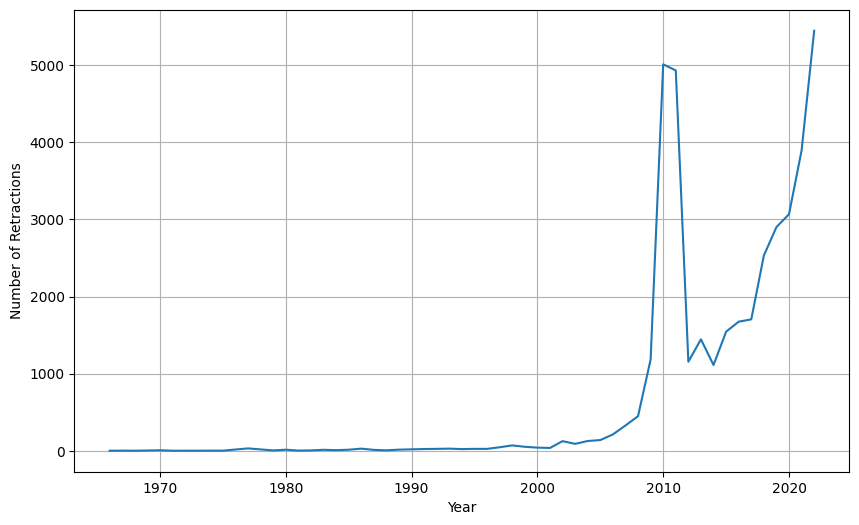

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(year_counts.index, year_counts.values)

plt.xlabel('Year')
plt.ylabel('Number of Retractions')
#plt.title('Evolution of number of retractions')
plt.grid(True)
plt.show()


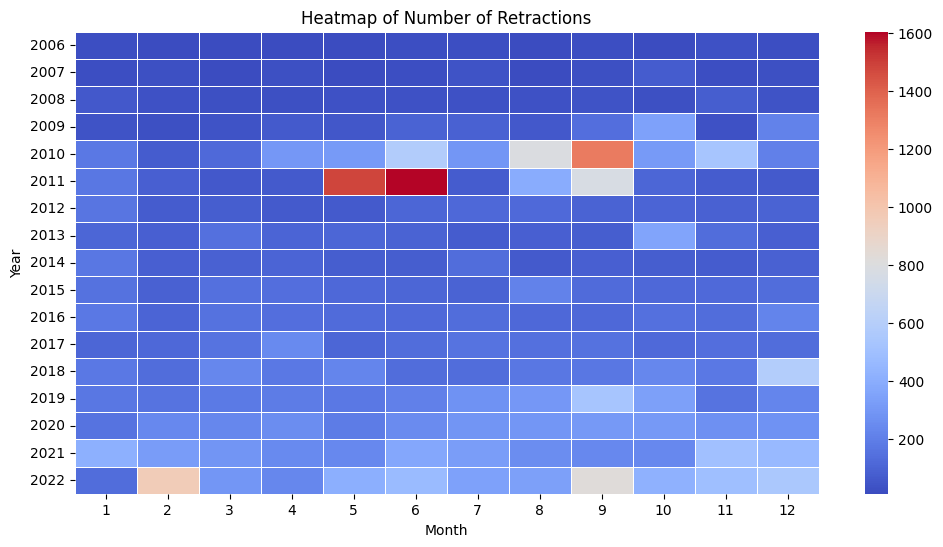

In [78]:
heatmap_data = rw[(rw['RetractionDate'].dt.year != 2023) & (rw['RetractionDate'].dt.year >2005)].copy()
heatmap_data['year'] = heatmap_data['RetractionDate'].dt.year
heatmap_data['month'] = heatmap_data['RetractionDate'].dt.month

heatmap_data = heatmap_data.pivot_table(index='year', columns='month', values='Record ID', aggfunc=pd.Series.nunique, fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot= False, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Number of Retractions')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [79]:
#check if probability of having retracted article that was published after the first retraction of the author


In [80]:
#year_counts_normalized = rw[(rw['RetractionDate'].dt.year != 2023) & (rw['RetractionDate'].dt.year >1960)].groupby(rw['RetractionDate'].dt.year)['Record ID'].count()
#year_counts_normalized

In [86]:
#average number of days until retraction
np.mean(rw['RetractionDate']-rw['OriginalPaperDate'])

Timedelta('838 days 19:34:25.573770496')

TO-DO: Get data of all articles and try retraction rate (per 10 000 papers)

# 2.2 - Reasons for Retraction <a class="anchor" id="section_2_2"></a>

In [19]:
motives = rw[['Record ID','Reason']]
motives.loc[:, 'Reason'] = motives['Reason'].str.split(';')
motives = motives.explode('Reason')
motives.loc[:, 'Reason'] = motives['Reason'].str.replace('+', '')
motives

,Record ID,Reason
0,47271,Investigation by Company/Institution
0,47271,Manipulation of Images
0,47271,Unreliable Results
0,47271,Upgrade/Update of Prior Notice
0,47271,
...,...,...
42697,18531,
42698,17246,Error in Analyses
42698,17246,
42699,18930,Error in Text


In [20]:
motives = motives[motives['Reason'].str.strip() != ""]

In [21]:
motives['Reason'].value_counts()[:30]

Reason
Notice - Limited or No Information                11033
Investigation by Journal/Publisher                 8941
Date of Retraction/Other Unknown                   6111
Breach of Policy by Author                         4728
Unreliable Results                                 4701
Concerns/Issues About Data                         4480
Fake Peer Review                                   4216
Withdrawal                                         3725
Investigation by Third Party                       3608
Duplication of Image                               3348
Duplication of Article                             3202
Euphemisms for Plagiarism                          2725
Concerns/Issues about Referencing/Attributions     2640
Investigation by Company/Institution               2630
Plagiarism of Article                              2411
Paper Mill                                         2282
Plagiarism of Text                                 2142
Misconduct by Author                     

Re-incidence comparison for misconduct and overall

In [57]:
authors = authors.copy()[['Record ID','Author', 'Reason']]
keywords = ["misconduct", "fraud", "manipulation", "fake", "falsification", "fabrication"]
#keywords = ["error in data", "rogue editor"]
authors['Misconduct'] = authors['Author'].isin(set(rw[rw['Reason'].str.lower().str.contains('|'.join(keywords))]['Author']))
authors.loc[:, 'Author'] = authors['Author'].str.split(';')
authors = authors.explode('Author')
authors[authors['Misconduct']==True].groupby('Author')['Record ID'].count().describe()

count    1086.000000
mean        5.621547
std        13.897633
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       194.000000
Name: Record ID, dtype: float64

In [51]:
authors.groupby('Author')['Record ID'].count().describe()

count    116296.000000
mean          1.426842
std           2.290002
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         194.000000
Name: Record ID, dtype: float64

In [55]:
# Step 3: Compare Re-incidents
total_authors = authors['Author'].nunique()
misconduct_authors = authors[authors['Misconduct']]['Author'].nunique()

# Calculate proportions
proportion_reincidents_total = rw[rw['Author'].isin(authors['Author'])]['Author'].nunique() / total_authors
proportion_reincidents_misconduct = rw[rw['Author'].isin(authors[authors['Misconduct']]['Author'])]['Author'].nunique() / misconduct_authors

# Print the results
print(f"Proportion of authors with re-incidents in the total dataset: {proportion_reincidents_total:.2%}")
print(f"Proportion of authors with re-incidents among misconduct authors: {proportion_reincidents_misconduct:.2%}")

Proportion of authors with re-incidents in the total dataset: 5.08%
Proportion of authors with re-incidents among misconduct authors: 100.00%


In [59]:
authors['Author'].value_counts().to_frame().reset_index()

,Author,count
0,Joachim Boldt,194
1,Yoshitaka Fujii,172
2,Hironobu Ueshima,124
3,Yoshihiro Sato,112
4,Unknown,111
...,...,...
116291,J Y Wang,1
116292,L H Qi,1
116293,H M Zheng,1
116294,H Qi,1


In [28]:
import pandas as pd

# Assuming df is your original DataFrame with columns "Author" and "Reason"

# Step 1: Preprocess the Data
authors = rw['Author'].str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True).reset_index(name='Author')

# Step 2: Create a Flag for Misconduct Authors
keywords = ["misconduct", "fraud", "manipulation", "fake", "falsification", "fabrication"]
keywords = ["error in data", "rogue editor"]
authors['Misconduct'] = authors['Author'].isin(set(rw[rw['Reason'].str.lower().str.contains('|'.join(keywords))]['Author']))

# Step 3: Compare Re-incidents
total_authors = authors['Author'].nunique()
misconduct_authors = authors[authors['Misconduct']]['Author'].nunique()

# Calculate proportions
proportion_reincidents_total = rw[rw['Author'].isin(authors['Author'])]['Author'].nunique() / total_authors
proportion_reincidents_misconduct = rw[rw['Author'].isin(authors[authors['Misconduct']]['Author'])]['Author'].nunique() / misconduct_authors

# Print the results
print(f"Proportion of authors with re-incidents in the total dataset: {proportion_reincidents_total:.2%}")
print(f"Proportion of authors with re-incidents among misconduct authors: {proportion_reincidents_misconduct:.2%}")


Proportion of authors with re-incidents in the total dataset: 5.08%
Proportion of authors with re-incidents among misconduct authors: 100.00%


In [29]:
authors

,index,Author,Misconduct
0,0,Elke Stein,False
1,0,Yimin Zou,False
2,0,Mu-ming Poo,False
3,0,Marc Tessier-Lavigne,False
4,1,Elke Stein,False
...,...,...,...
165931,42695,Brainerd Currie,False
165932,42696,Max Planck,False
165933,42697,Max Planck,False
165934,42698,C H Whelden Jr,False


juntar estes artigos à informação do web of science (para ter abstract etc.). pesquisar por esses artigos.

In [13]:
#motives['Reason'].value_counts().to_excel('../motives_retractions.xlsx')

# 2.3 - Geographical Differences <a class="anchor" id="section_2_3"></a>

In [14]:
rw['Country'].value_counts()

Country
China                                      19446
United States                               3123
India                                       2534
Russia                                      2445
Japan                                       1072
                                           ...  
Mexico;South Africa                            1
Belgium;Switzerland                            1
Iran;Iraq;United States                        1
Belgium;China;Switzerland;United States        1
Spain;United Kingdom;United States             1
Name: count, Length: 1721, dtype: int64

In [15]:
aux = rw.copy()
aux.loc[:, 'Country'] = rw['Country'].str.split(';')
aux.explode('Country')['Country'].value_counts()

Country
China            20944
United States     4988
India             3060
Russia            2589
Japan             1378
                 ...  
Namibia              1
Lesotho              1
Jamaica              1
Cook Islands         1
Sierra Leone         1
Name: count, Length: 172, dtype: int64

In [16]:
# Split the 'Country' column by ";" and count the number of countries in each record
country = rw.copy()
country['Country_Count'] = rw['Country'].str.split(';').apply(len)
country['Single_Multiple_Country'] = country['Country_Count'].apply(lambda x: 'Single Country' if x == 1 else 'Multiple Countries')
country.head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,Country_Count,Single_Multiple_Country
0,47271,Binding of DCC by Netrin-1 to Mediate Axon Gui...,(BLS) Biology - Cellular;(BLS) Biology - Gener...,Departments of Anatomy and of Biochemistry and...,Science,American Association for the Advancement of Sc...,United States,Elke Stein;Yimin Zou;Mu-ming Poo;Marc Tessier-...,https://retractionwatch.com/2023/08/31/stanfor...,Research Article;,...,0.0,2001-03-09 00:00:00,10.1126/science.1059391,11239160.0,Retraction,+Investigation by Company/Institution;+Manipul...,No,NaN,1,Single Country
1,47270,Hierarchical Organization of Guidance Receptor...,(BLS) Biochemistry;(BLS) Biology - General;(BL...,Department of Anatomy and Department of Bioche...,Science,American Association for the Advancement of Sc...,United States,Elke Stein;Marc Tessier-Lavigne,https://retractionwatch.com/2023/08/31/stanfor...,Research Article;,...,0.0,2001-02-08 00:00:00,10.1126/science.1058445,11239147.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,1,Single Country
2,47243,Therapeutic potential of targeting IRES-depend...,(BLS) Biochemistry;(BLS) Biology - Cancer;(BLS...,"Division of Hematology-Oncology, UCLA-Greater ...",Oncogene,Springer - Nature Publishing Group,United States,Y Shi;Y Yang;C Bardeleben;B Holmes;J Gera;Alan...,NaN,Research Article;,...,0.0,2015-05-11 00:00:00,10.1038/onc.2015.156,25961916.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,see also: https://pubpeer.com/publications/704...,1,Single Country
3,47233,A classifier based on 273 urinary peptides pre...,(BLS) Biochemistry;(HSC) Medicine - Cardiovasc...,"Department of Nephrology, The Third Affiliated...",Journal of Hypertension,Wolters Kluwer - Lippincott Williams & Wilkins,China,Lirong Lin;Chunxuan Wang;Jiangwen Ren;Mei Mei;...,NaN,Research Article;,...,37642599.0,2023-08-01 00:00:00,10.1097/HJH.0000000000003467,37199562.0,Retraction,+Concerns/Issues About Results;+Investigation ...,No,see also https://journals.lww.com/jhypertensio...,1,Single Country
4,47227,"Age, Gender Demographics and Comorbidity Preva...",(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,"Department of Orthopaedics, Dhanalakshmi Srini...",Journal of Coastal Life Medicine,Journal of Coastal Life Medicine,India,S Venkatesh Kumar;Mohith Singh;Gowtham Singh;K...,NaN,Research Article;,...,0.0,2023-01-01 00:00:00,unavailable,0.0,Retraction,+Notice - Lack of;+Withdrawal;,No,"date of retraction unknown, article title repl...",1,Single Country


In [17]:
country = country[['Record ID','Country', 'Single_Multiple_Country']]
country.loc[:, 'Country'] = country['Country'].str.split(';')
country = country.explode('Country')
country

,Record ID,Country,Single_Multiple_Country
0,47271,United States,Single Country
1,47270,United States,Single Country
2,47243,United States,Single Country
3,47233,China,Single Country
4,47227,India,Single Country
...,...,...,...
42695,10433,United States,Single Country
42696,18529,Germany,Single Country
42697,18531,Germany,Single Country
42698,17246,United States,Single Country


In [19]:
# Create a DataFrame to count retractions by country and category
country_counts = country.groupby(['Country', 'Single_Multiple_Country']).size().reset_index(name='Count')

# Sort the DataFrame by Count in descending order and take the top 15 countries
top_15_countries = country_counts.sort_values(by='Count', ascending=False).head(20)

# Create a histogram with countries on the y-axis
fig = px.bar(top_15_countries, y='Country', x='Count', color='Single_Multiple_Country',
             orientation='h',  # Horizontal orientation for countries on the y-axis
             title='Top 15 Countries with Most Retractions by Category',
             labels={'Single_Multiple_Country': 'Publication Category', 'Count': 'Count'},
             category_orders={'Single_Multiple_Country': ['Single Country', 'Multiple Countries']})

fig.update_layout(barmode='stack')  # Stacked histogram

fig.show()

In [ ]:
#country['Country'].value_counts().to_excel('./country_retractions.xlsx')

In [20]:
country_codes = pd.read_excel('../country_codes.xlsx')
country_codes

,country,alpha2_code,alpha3_code,numeric
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
...,...,...,...,...
246,Yemen,YE,YEM,887
247,Zambia,ZM,ZMB,894
248,Zimbabwe,ZW,ZWE,716
249,Gaza Strip,PS,PSE,275


In [22]:

countries = rw.merge(country_codes, how='left', left_on="Country", right_on='country')

# Group by 'alpha3_code' and 'Country' and count the number of records in each group
country_counts = countries.groupby(['alpha3_code', 'Country']).size().reset_index(name='Record_Count')

fig = px.choropleth(country_counts, locations="alpha3_code",
                    color="Record_Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [23]:
country_counts

,alpha3_code,Country,Record_Count
0,ALB,Albania,3
1,ARE,United Arab Emirates,16
2,ARG,Argentina,31
3,ARM,Armenia,2
4,AUS,Australia,249
...,...,...,...
121,UZB,Uzbekistan,20
122,VEN,Venezuela,4
123,VNM,Vietnam,22
124,YEM,Yemen,2


# 2.4 - Analysis per Journal <a class="anchor" id="section_2_4"></a>

# 2.5 - Analysis per Scientific area <a class="anchor" id="section_2_5"></a>

In [ ]:
subject = rw[['Record ID','Subject']]
subject.loc[:, 'Subject'] = subject['Subject'].str.split(';')
subject = subject.explode('Subject')
subject = subject[subject['Subject'].str.strip() != ""]
subject

,Record ID,Subject
0,47271,(BLS) Biology - Cellular
0,47271,(BLS) Biology - General
0,47271,(BLS) Biology - Molecular
0,47271,(BLS) Neuroscience
1,47270,(BLS) Biochemistry
...,...,...
42696,18529,(PHY) Physics
42697,18531,(PHY) Physics
42697,18531,(SOC) Philosophy
42698,17246,(ENV) Climatology


In [ ]:
subject['Subject'].value_counts()#[:30]

Subject
(BLS) Biology - Cellular         8013
(B/T) Technology                 5677
(BLS) Genetics                   5154
(BLS) Biochemistry               4649
(B/T) Computer Science           4622
                                 ... 
(B/T) Foreign Aid                   8
(HUM) History - South America       7
(HUM) History - United States       7
(PHY) Forensic Sciences             3
(HUM) History - Australia           1
Name: count, Length: 130, dtype: int64

In [ ]:
subject['Subject'].value_counts().to_excel('../subject_retractions.xlsx')